<a href="https://colab.research.google.com/github/irakozej/Predict-Student-Dropout-Risk/blob/main/Intro_to_ML_Summatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# For data handling
import pandas as pd
import numpy as np

# For preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib  # for saving model

import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow for NN models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import load_model



# Suppress warnings for readability
import warnings
warnings.filterwarnings('ignore')


## Load & Inspect the Dataset

In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os

# List files under a specific folder
base_path = "/content/drive/MyDrive/"
for root, dirs, files in os.walk(base_path):
    for file in files:
        print(os.path.join(root, file))


/content/drive/MyDrive/IRAKOZE Jean Paul    Cohort 1 PART 2 English Proficiency Assessment_January_2023.gdoc
/content/drive/MyDrive/IRAKOZE Jean Paul Cohort 1  English Proficiency Assessment_January_2023.gdoc
/content/drive/MyDrive/Book report (1).gslides
/content/drive/MyDrive/Book report.gslides
/content/drive/MyDrive/Essay.gdoc
/content/drive/MyDrive/IRAKOZE Jean Paul_cohort 6_negpod 5_Personal Reflection Essay..gdoc
/content/drive/MyDrive/Copy of (MAKE A COPY)Articulating Process | Journal -01.gdoc
/content/drive/MyDrive/Group discussion_Cohort 6_negport5.gdoc
/content/drive/MyDrive/IRAKOZE_Jean Paul_Y1T1 Mission Development [RT_Summative]..gdoc
/content/drive/MyDrive/ Personal SWOT Workbook_Template [Make a copy].gslides
/content/drive/MyDrive/Copy of [Make a copy] Personalized Action Plan (1).gdoc
/content/drive/MyDrive/Copy of [Make a copy] Personalized Action Plan.gdoc
/content/drive/MyDrive/Copy of Copy of 2020_SP_ALU Resume Template [MAKE A COPY]_v3.gdoc
/content/drive/MyDriv

In [21]:
file_path = "/content/drive/MyDrive/ML_Dropout_Project/data_student_dropout.csv"


In [22]:
import os
os.listdir('/content/drive/MyDrive/ML_Dropout_Project')


['data_student_dropout.csv']

In [23]:
# Fix: read CSV using semicolon delimiter
df = pd.read_csv(file_path, delimiter=';')

# Confirm columns are now separated properly
print(df.columns)
df.head()


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preprocessing

In [24]:
print(df.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target labels (Dropout, Enrolled, Graduate → 0, 1, 2)
label_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Target'] = df['Target'].map(label_mapping)

# Split features and target
X = df.drop('Target', axis=1)
y = df['Target']

# LabelEncode all categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalize all numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train (70%), val (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (3096, 36)
Validation shape: (664, 36)
Test shape: (664, 36)


In [26]:
label_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Target'] = df['Target'].map(label_mapping)

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']


## Optimized Neural Networks (Instances 2–4)


In [27]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

def define_model(input_dim, optimizer_name, reg=None, dropout_rate=0.0, early_stop=False, lr=0.001, layers=[64, 32]):
    model = Sequential()

    # First hidden layer with optional regularizer
    if reg == 'l2':
        reg_func = regularizers.l2(0.01)
    elif reg == 'l1':
        reg_func = regularizers.l1(0.01)
    else:
        reg_func = None

    model.add(Dense(layers[0], activation='relu', input_dim=input_dim, kernel_regularizer=reg_func))
    model.add(Dropout(dropout_rate))
    model.add(Dense(layers[1], activation='relu', kernel_regularizer=reg_func))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))

    # Choose optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = 'adam'

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    callbacks = [EarlyStopping(patience=5, restore_best_weights=True)] if early_stop else []

    return model, callbacks


## Utility Function to Train and Evaluate Model

## Define & Train Model 1

In [28]:
def create_baseline_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train
model_1 = create_baseline_model(X_train.shape[1], 3)

history_1 = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)


## Evaluate and Visualize

In [29]:
# Evaluate
loss_1, accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)
print(f"✅ Model 1 Accuracy: {accuracy_1:.4f}")

# Predict
y_pred_1 = model_1.predict(X_test)
y_pred_labels_1 = np.argmax(y_pred_1, axis=1)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Model 1 - Classification Report")
print(classification_report(y_test, y_pred_labels_1, target_names=['Dropout', 'Enrolled', 'Graduate']))


✅ Model 1 Accuracy: 0.7590
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model 1 - Classification Report
              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.79       214
    Enrolled       0.46      0.46      0.46       119
    Graduate       0.83      0.86      0.84       331

    accuracy                           0.76       664
   macro avg       0.70      0.70      0.70       664
weighted avg       0.76      0.76      0.76       664



## Confusion Matrix + Loss Curve

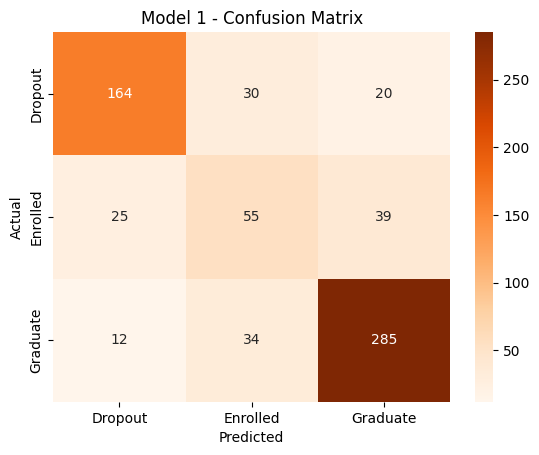

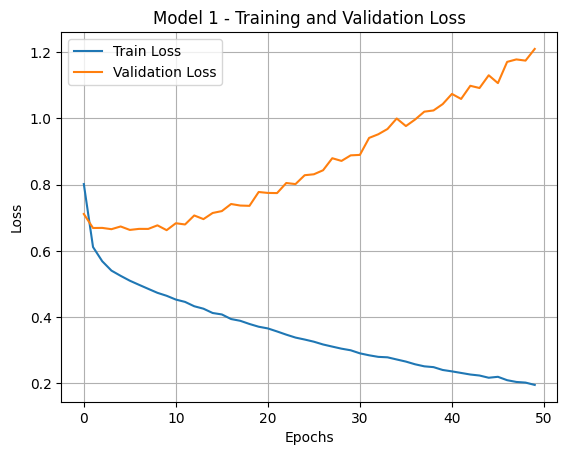

In [30]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels_1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title("Model 1 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Loss curve
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Save Model 1

In [31]:
model_1.save("/content/drive/MyDrive/saved_models/model_1_baseline.keras")


In [32]:
def train_evaluate_model(name, input_dim, **kwargs):
    model, callbacks = define_model(input_dim=input_dim, **kwargs)
    history = model.fit(X_train, y_train, epochs=kwargs.get("epochs", 50), validation_data=(X_val, y_val),
                        callbacks=callbacks, verbose=0)


    # Save model
    model.save(f"/content/drive/MyDrive/saved_models/{name}.keras")

    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    print(f"\n🧠 {name.upper()} Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred_labels, target_names=['Dropout', 'Enrolled', 'Graduate']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dropout', 'Enrolled', 'Graduate'],
                yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss curve
    plot_loss(history, f"{name} - Loss Curve")

    return {
        "name": name,
        "accuracy": accuracy_score(y_test, y_pred_labels),
        "precision": precision_score(y_test, y_pred_labels, average='weighted'),
        "recall": recall_score(y_test, y_pred_labels, average='weighted'),
        "f1": f1_score(y_test, y_pred_labels, average='weighted'),
        "loss": test_loss
    }

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


## Train and Evaluate Instances 2–4

In [33]:
def train_evaluate_model(name, input_dim, **kwargs):
    # Extract epochs separately and remove from kwargs
    epochs = kwargs.pop("epochs", 50)

    # Build model
    model, callbacks = define_model(input_dim=input_dim, **kwargs)

    # Train model
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val),
                        callbacks=callbacks, verbose=0)

    # Save model
    model.save(f"/content/drive/MyDrive/saved_models/{name}.h5")

    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    print(f"\n🧠 {name.upper()} Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred_labels, target_names=['Dropout', 'Enrolled', 'Graduate']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dropout', 'Enrolled', 'Graduate'],
                yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss curve
    plot_loss(history, f"{name} - Loss Curve")

    return {
        "name": name,
        "accuracy": accuracy_score(y_test, y_pred_labels),
        "precision": precision_score(y_test, y_pred_labels, average='weighted'),
        "recall": recall_score(y_test, y_pred_labels, average='weighted'),
        "f1": f1_score(y_test, y_pred_labels, average='weighted'),
        "loss": test_loss
    }


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

🧠 MODEL_2_ADAM_L2_DROPOUT03_ES Results:
Accuracy: 0.7937
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.82      0.80      0.81       214
    Enrolled       0.59      0.38      0.46       119
    Graduate       0.82      0.94      0.87       331

    accuracy                           0.79       664
   macro avg       0.74      0.71      0.72       664
weighted avg       0.78      0.79      0.78       664



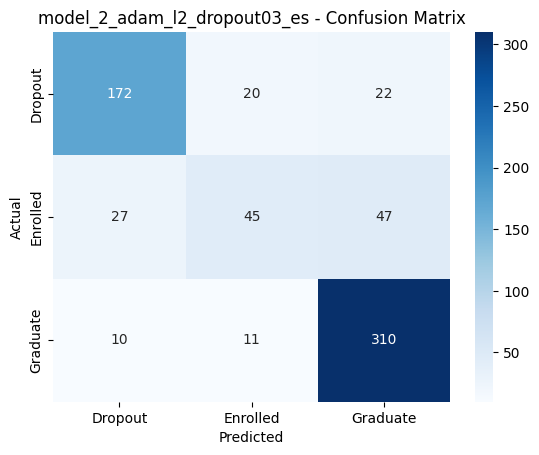

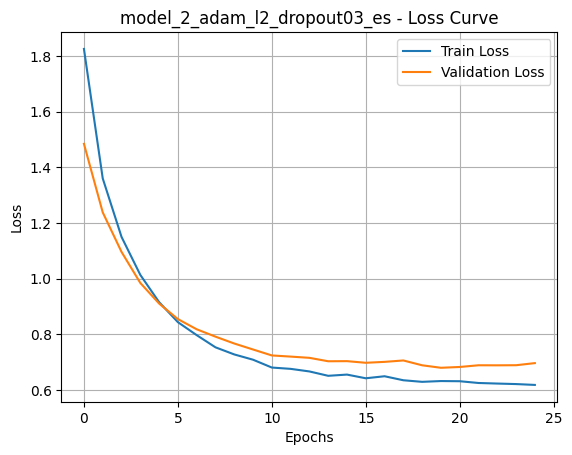

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

🧠 MODEL_3_RMSPROP_DROPOUT05 Results:
Accuracy: 0.7846
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.87      0.76      0.81       214
    Enrolled       0.51      0.45      0.48       119
    Graduate       0.82      0.92      0.87       331

    accuracy                           0.78       664
   macro avg       0.73      0.71      0.72       664
weighted avg       0.78      0.78      0.78       664



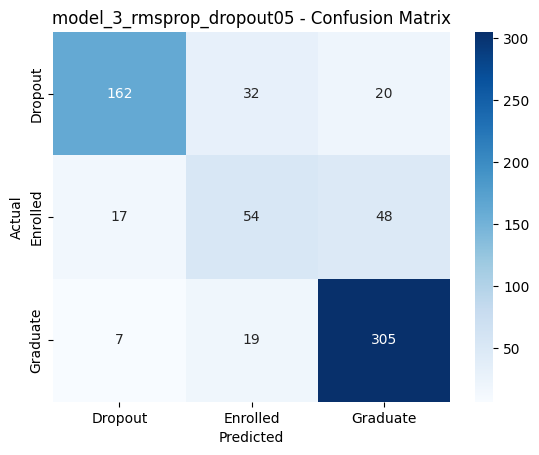

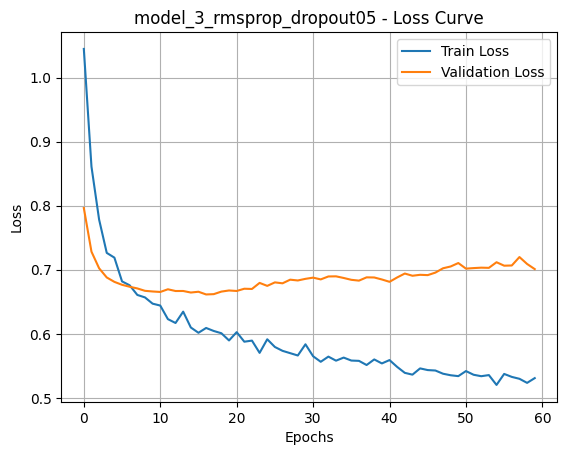

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

🧠 MODEL_4_ADAM_L1_DROPOUT02_ES Results:
Accuracy: 0.7530
Classification Report:

              precision    recall  f1-score   support

     Dropout       0.73      0.86      0.79       214
    Enrolled       0.29      0.02      0.03       119
    Graduate       0.78      0.95      0.85       331

    accuracy                           0.75       664
   macro avg       0.60      0.61      0.56       664
weighted avg       0.67      0.75      0.69       664



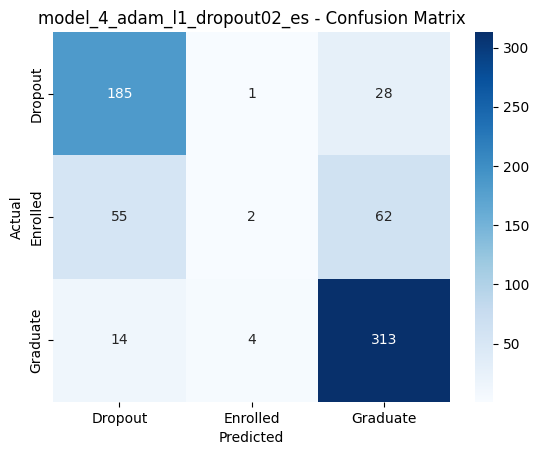

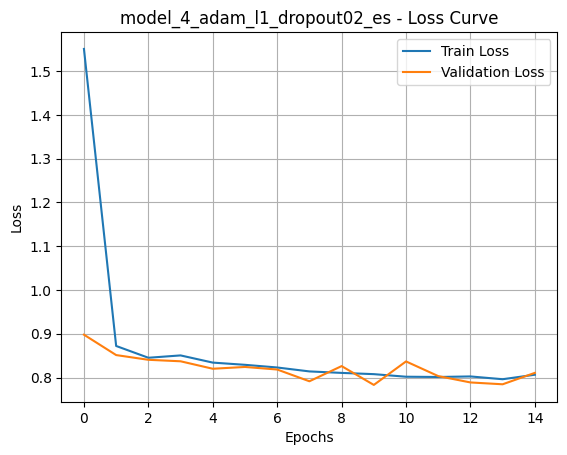

In [34]:
results = []

# Instance 2
results.append(train_evaluate_model(
    name="model_2_adam_l2_dropout03_es",
    input_dim=X_train.shape[1],
    optimizer_name='adam',
    reg='l2',
    dropout_rate=0.3,
    early_stop=True,
    lr=0.001,
    epochs=50,
    layers=[64, 32]
))

# Instance 3
results.append(train_evaluate_model(
    name="model_3_rmsprop_dropout05",
    input_dim=X_train.shape[1],
    optimizer_name='rmsprop',
    reg=None,
    dropout_rate=0.5,
    early_stop=False,
    lr=0.0005,
    epochs=60,
    layers=[128, 64]
))

# Instance 4
results.append(train_evaluate_model(
    name="model_4_adam_l1_dropout02_es",
    input_dim=X_train.shape[1],
    optimizer_name='adam',
    reg='l1',
    dropout_rate=0.2,
    early_stop=True,
    lr=0.01,
    epochs=40,
    layers=[32, 16]
))


## Classical ML Model – Logistic Regression

### Setup and Tune the Model

In [35]:
# Define model and hyperparameter grid
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],  # regularization strength
    'solver': ['lbfgs', 'saga']
}

# Grid search with cross-validation
grid_search = GridSearchCV(lr_model, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best model
best_lr_model = grid_search.best_estimator_


### Evaluate the Model

🔍 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

     Dropout       0.84      0.79      0.81       214
    Enrolled       0.54      0.37      0.44       119
    Graduate       0.80      0.92      0.86       331

    accuracy                           0.78       664
   macro avg       0.73      0.69      0.70       664
weighted avg       0.77      0.78      0.77       664



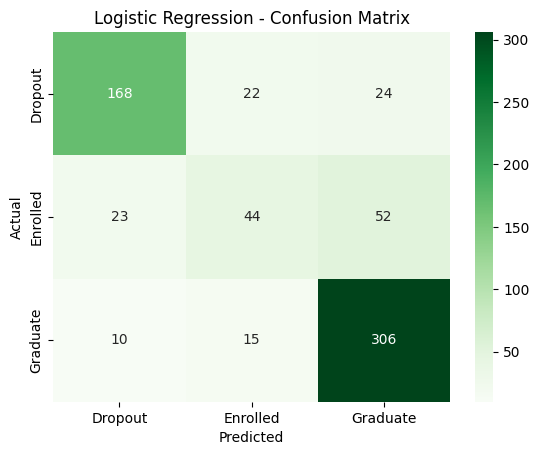

In [36]:
# Predict on test set
y_pred_lr = best_lr_model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("🔍 Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr, target_names=['Dropout', 'Enrolled', 'Graduate']))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
# Save to Drive
joblib.dump(best_lr_model, "/content/drive/MyDrive/saved_models/logistic_regression_model.pkl")


['/content/drive/MyDrive/saved_models/logistic_regression_model.pkl']